# Kmeans clustering of wind farms
Read in a file of 137 operating wind farms that produce 79% of California's wind power and group into 7 <a href='#clusters'>clusters</a> that will have similar weather forecasts.

### Imports

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

#### Define color mapping function

In [2]:
def rgb_calc(minn,maxx,val):
    scaled = (val-minn)/(maxx-minn)
    if scaled <= 0.25:
        return [1,4*scaled,0]
    if scaled > 0.25 and scaled <= 0.5:
        return [(-4)*scaled+2,1,0]
    if scaled > 0.5 and scaled <= 0.75:
        return [0,1,4*scaled-2]
    if scaled > 0.75:
        return [0,(-4)*scaled+4,1]
    else:
        return [0,0,0]

### Read in data

In [3]:
main_wind = pd.read_csv('../datasets/main_wind.csv')
print(main_wind.shape)
main_wind.head(3)

(137, 56)


,OBJECTID_12_13,Plant_ID,Plant_Alias,Plant_Label,MW,Gross_MWh,Net_MWh,General_Fuel,Status,STEP_License_Status,...,Operation_Job,Property_Tax,Capacity_Factor,Income_Percent,Project_Location,Creator,Creator_Date,Last_Editor,Last_Editor_Date,GlobalID
0,1,W0464,NaN,El Cabo,298.2,NaN,NaN,Wind,Operating,NaN,...,NaN,NaN,NaN,NaN,NaN,cecgis,1581101982706,cecgis,1581101982706,0da84d14-5867-4396-8004-5ce07b6d6dd9
1,674,W0359,Kumeyaay; Kumeyaay Wind; Kumeyaay Wind Energy ...,Kumeyaay,50.0,155200.97,155201.0,Wind,Operating,NaN,...,NaN,NaN,0.353372,66.0,Neither Low Income Nor Disadvantaged Community,cecgis,1581101982706,cecgis,1581101982706,d4ee4d2f-7253-4169-805b-6f41da49f232
2,675,W0390,NaN,Golden Acorn Casino,1.0,4113.98,4114.0,Wind,Operating,NaN,...,NaN,NaN,0.468352,66.0,Neither Low Income Nor Disadvantaged Community,cecgis,1581101982706,cecgis,1581101982706,f0db0dca-a275-4cbc-a2b9-b066daec8060


### Fit KMeans cluster model with 30 clusters

In [4]:
X = main_wind[['Longitude','Latitude']]

km = KMeans(n_clusters=7,random_state=2020)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2020, tol=0.0001, verbose=0)

### Label plants with cluster number and assign a plotting color

In [5]:
main_wind['cluster'] = km.labels_
main_wind['color'] = main_wind['cluster'].map(lambda p: rgb_calc(0,29,p))

<a id="clusters"><a>

### Visualize clusters

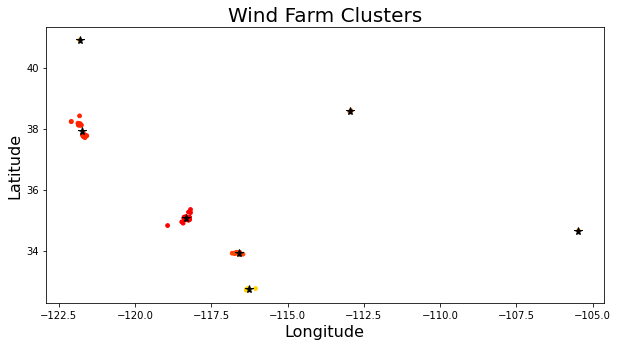

In [6]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(main_wind['Longitude'],main_wind['Latitude'],c=main_wind['color'],s=14)
ax.plot(km.cluster_centers_[:,0],km.cluster_centers_[:,1],'k*',markersize=8)
ax.set_aspect('equal')
plt.title('Wind Farm Clusters',fontsize=20)
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16);

#### Wind Farm Clusters
- Each color denotes a new cluster
- The black stars show the cluster centroids
- Each centroid will be used to collect windspeed data to predict generated output for the given cluster

### Group solar plants by cluster and aggregate total capacity in MW

In [7]:
wind_clusters = main_wind.groupby('cluster').sum()
wind_clusters['Longitude'] = km.cluster_centers_[:,0]
wind_clusters['Latitude'] = km.cluster_centers_[:,1]
wind_clusters = wind_clusters[['Longitude','Latitude','MW']]
print(wind_clusters.shape)
wind_clusters.head()

(7, 3)


,Longitude,Latitude,MW
cluster,,,
0,-118.320799,35.062432,3526.14
1,-121.736003,37.920458,1657.66
2,-116.606149,33.918124,687.85
3,-112.935725,38.571090,304.00
4,-105.461670,34.651112,298.20


### Export data

In [8]:
# wind_clusters.to_csv('../datasets/wind_clusters.csv',index=False)